In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle, bz2
from skimage import io, transform
%matplotlib inline

# Lab: convolution matrix for convolution and transposed convolutions

Read and understand well how the convolution matrix is built: [Up-sampling with Transposed Convolution](https://towardsdatascience.com/up-sampling-with-transposed-convolution-9ae4f2df52d0)

Observe how a 2d convolution is done with a `tf.layers.conv2d` Keras layer (with linear activation and zero bias)

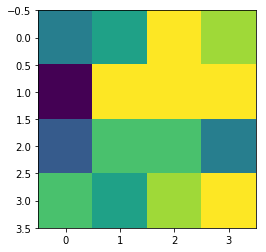

In [2]:
simg = np.r_[[[4,5,8,7],[1,8,8,8],[3,6,6,4],[6,5,7,8]]]
akernel = np.r_[[[1,4,1],[1,4,3],[3,3,1]]]

#simg = np.random.randint(10, size=(10,6))
#akernel = np.random.randint(10, size=(5,5))+1

plt.imshow(simg)

In [3]:
tf.reset_default_graph()

tX    = tf.placeholder(tf.float32, shape=[None] + list(simg.shape)+[1], name="X")
layer = tf.layers.conv2d(tX, filters=1, kernel_size=akernel.shape, 
                         kernel_initializer=tf.initializers.constant(akernel),
                         bias_initializer=tf.initializers.constant([0]), 
                         activation="linear")

init  = tf.global_variables_initializer()

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.


In [4]:
with tf.Session() as sess:
    sess.run(init)
    routput = sess.run(layer, feed_dict={tX: simg.reshape([-1]+list(simg.shape)+[1])})

In [5]:
print(routput[0,:,:,0])

[[122. 148.]
 [126. 134.]]


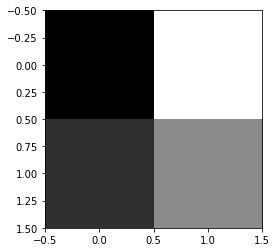

In [6]:
plt.imshow(routput[0,:,:,0], cmap=plt.cm.Greys_r)

## Part 1: Create the convolution matrix

fill in the following function to create a convolution matrix.

given:

- an input image of dimensions $h\times w$
- a squared filter (kernel) of dimensions $k \times k$
- no padding used

the resulting convolution matrix must have dimensions 

$$(h-k+1)(w-k+1) \times hw$$

suggestions:

- start with the same input image and kernel as in the example in [Up-sampling with Transposed Convolution](https://towardsdatascience.com/up-sampling-with-transposed-convolution-9ae4f2df52d0):
    
       simg = np.r_[[[4,5,8,7],[1,8,8,8],[3,6,6,4],[6,5,7,8]]]
       kernel = np.r_[[[1,4,1],[1,4,3],[3,3,1]]]
       
- test with random imgs and kernels (as in the code above) with increasing dimensions and images with different width and height

In [7]:
def get_convmatrix(input_shape, kernel):
    dx, dy = np.r_[input_shape[0] - kernel.shape[0]+1, input_shape[1] - kernel.shape[1]+1]
    cm = np.zeros((np.product(input_shape), dx*dy)).T

    .....
    
    return cm

In [8]:
cm = get_convmatrix(simg.shape, akernel)
cm.shape

(4, 16)

In [9]:
cm

array([[1., 4., 1., 0., 1., 4., 3., 0., 3., 3., 1., 0., 0., 0., 0., 0.],
       [0., 1., 4., 1., 0., 1., 4., 3., 0., 3., 3., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 4., 1., 0., 1., 4., 3., 0., 3., 3., 1., 0.],
       [0., 0., 0., 0., 0., 1., 4., 1., 0., 1., 4., 3., 0., 3., 3., 1.]])

## Part 2: use the convolution matrix above to make a 2d convolution

must call the previous `get_convmatrix` and use a single matrix multiplication operation

In [10]:
def conv2d(img,kernel):
    cm = get_convmatrix(...)
    ...
    moutput = ....
    return moutput

In [11]:
moutput = conv2d(simg, akernel)
moutput

array([[122., 148.],
       [126., 134.]])

the following must come out `True`

In [12]:
np.allclose(routput, moutput.reshape(routput.shape))

True

## Part 3: make a transposed 2d convolution using `tf.layers.conv2d_transpose`

In [13]:
small_img = np.random.randint(10, size=(2,2))+1
small_img

array([[ 4, 10],
       [ 7,  5]])

In [14]:
def TF_conv2d_transpose(img, kernel):
    tf.reset_default_graph()

    tX    = tf.placeholder(...)
    layer = tf.layers.conv2d_transpose(...)

    init  = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        routput = sess.run(...)
        
    return routput

In [15]:
routput = TF_conv2d_transpose(small_img, akernel)

In [16]:
routput[0,:,:,0]

array([[ 4., 26., 44., 10.],
       [11., 59., 79., 35.],
       [19., 75., 75., 25.],
       [21., 36., 22.,  5.]], dtype=float32)

## Part 4: Make a transposed 2d convolution using the convolution matrix above

your result must be exactly the same as previous part

In [17]:
def conv2d_transpose(img, kernel):
    cm = get_convmatrix(...)
    ...
    return ...

In [18]:
moutput = conv2d_transpose(small_img, akernel)
moutput

array([[ 4., 26., 44., 10.],
       [11., 59., 79., 35.],
       [19., 75., 75., 25.],
       [21., 36., 22.,  5.]])

In [19]:
np.allclose(routput[0,:,:,0], moutput )

True